## DATA EXPLORING

In [ ]:
%pip install seaborn
%pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def load_dataset():
    df = pd.read_csv('/content/sample_data/HDFCBANK.NS.csv')
    return df


stock_of_bank = load_dataset()

In [ ]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("\nFirst 10 rows of dataset:")
    print(dataset.head(10))
    print("\nStatistical summary:")
    print(dataset.describe())


print_summarize_dataset(stock_of_bank)

Dataset dimension:
(6567, 7)

First 10 rows of dataset:
         Date   Open   High    Low  Close  Adj Close    Volume
0  1996-01-01  3.030  3.030  2.925  2.980   2.417746  350000.0
1  1996-01-02  2.980  3.025  2.950  2.975   2.413689  412000.0
2  1996-01-03  2.975  2.995  2.950  2.985   2.421803  284000.0
3  1996-01-04  2.985  2.980  2.940  2.965   2.405575  282000.0
4  1996-01-05  2.965  2.980  2.950  2.960   2.401519  189000.0
5  1996-01-08  2.960  2.950  2.910  2.925   2.373122  237000.0
6  1996-01-09  2.925  2.925  2.800  2.830   2.296047  483000.0
7  1996-01-10  2.830  2.865  2.810  2.840   2.304160  226000.0
8  1996-01-11  2.840  2.880  2.800  2.830   2.296047  318000.0
9  1996-01-12  2.830  2.835  2.800  2.825   2.291991  431000.0

Statistical summary:
              Open         High          Low        Close    Adj Close  \
count  6560.000000  6560.000000  6560.000000  6560.000000  6560.000000   
mean    337.150200   340.552696   333.371148   337.043588   328.143780   
std    

In [ ]:
stock_of_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6567 non-null   object 
 1   Open       6560 non-null   float64
 2   High       6560 non-null   float64
 3   Low        6560 non-null   float64
 4   Close      6560 non-null   float64
 5   Adj Close  6560 non-null   float64
 6   Volume     6560 non-null   float64
dtypes: float64(6), object(1)
memory usage: 359.3+ KB


In [ ]:
stock_of_bank.describe()

Open         High          Low        Close    Adj Close  \
count  6560.000000  6560.000000  6560.000000  6560.000000  6560.000000   
mean    337.150200   340.552696   333.371148   337.043588   328.143780   
std     428.941250   432.701668   424.683662   428.705850   426.934669   
min       2.435000     2.435000     2.395000     2.435000     1.975574   
25%      23.799999    24.098750    23.309999    23.653751    20.443190   
50%     134.424995   138.074997   130.504998   133.782501   122.550351   
75%     513.462509   518.424988   509.062492   513.737488   495.121086   
max    1705.000000  1725.000000  1671.000000  1688.699951  1688.699951   

             Volume  
count  6.560000e+03  
mean   4.941709e+06  
std    5.711678e+06  
min    0.000000e+00  
25%    1.563008e+06  
50%    3.427885e+06  
75%    6.361122e+06  
max    2.011300e+08

In [ ]:
stock_of_bank.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [ ]:
stock_of_bank.dropna(inplace=True)

In [ ]:
import datetime


def convert_to_datetime(dataset):
    split = [int(s) for s in dataset.split('-')] 
    year, month, day = split[0], split[1], split[2]
    return datetime.datetime(year = year, month = month, day = day)


stock_of_bank['Date'] = stock_of_bank['Date'].apply(convert_to_datetime)

In [ ]:
stock_of_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6560 entries, 0 to 6566
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6560 non-null   datetime64[ns]
 1   Open       6560 non-null   float64       
 2   High       6560 non-null   float64       
 3   Low        6560 non-null   float64       
 4   Close      6560 non-null   float64       
 5   Adj Close  6560 non-null   float64       
 6   Volume     6560 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 410.0 KB


In [ ]:
def split_df(dataset):
    return [dataset[['Date', i]].set_index('Date') for i in list(dataset.columns)[1:]]


df_open, df_high, df_low, df_close, df_adj_close, df_volume = split_df(stock_of_bank)
print(df_high)

                   High
Date                   
1996-01-01     3.030000
1996-01-02     3.025000
1996-01-03     2.995000
1996-01-04     2.980000
1996-01-05     2.980000
...                 ...
2022-01-17  1556.000000
2022-01-18  1550.900024
2022-01-19  1539.750000
2022-01-20  1528.500000
2022-01-21  1529.800049

[6560 rows x 1 columns]


In [ ]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose


def multiplicative_decompose(data, year):
    result_M = seasonal_decompose(data.loc[year:], model='multiplicative', freq=12)
    plt.rcParams.update({'figure.figsize': (18,10)})
    result_M.plot().suptitle('Multiplicative model')
    return result_M


def additive_decompose(data, year):
    result_A = seasonal_decompose(data.loc[year:], model='additive', freq=12)
    plt.rcParams.update({'figure.figsize': (18,10)})
    result_A.plot().suptitle('Aditive model')
    return result_A
  

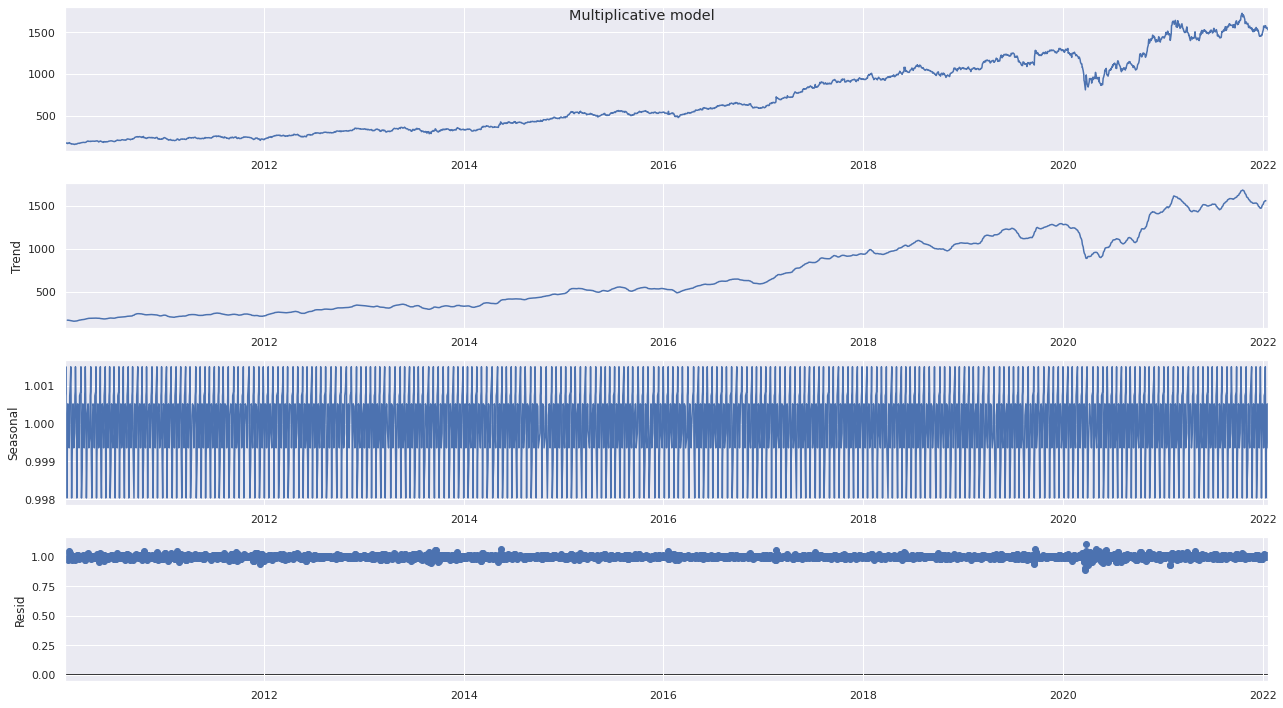

In [ ]:
multiplicative_decompose(df_high, '2010')

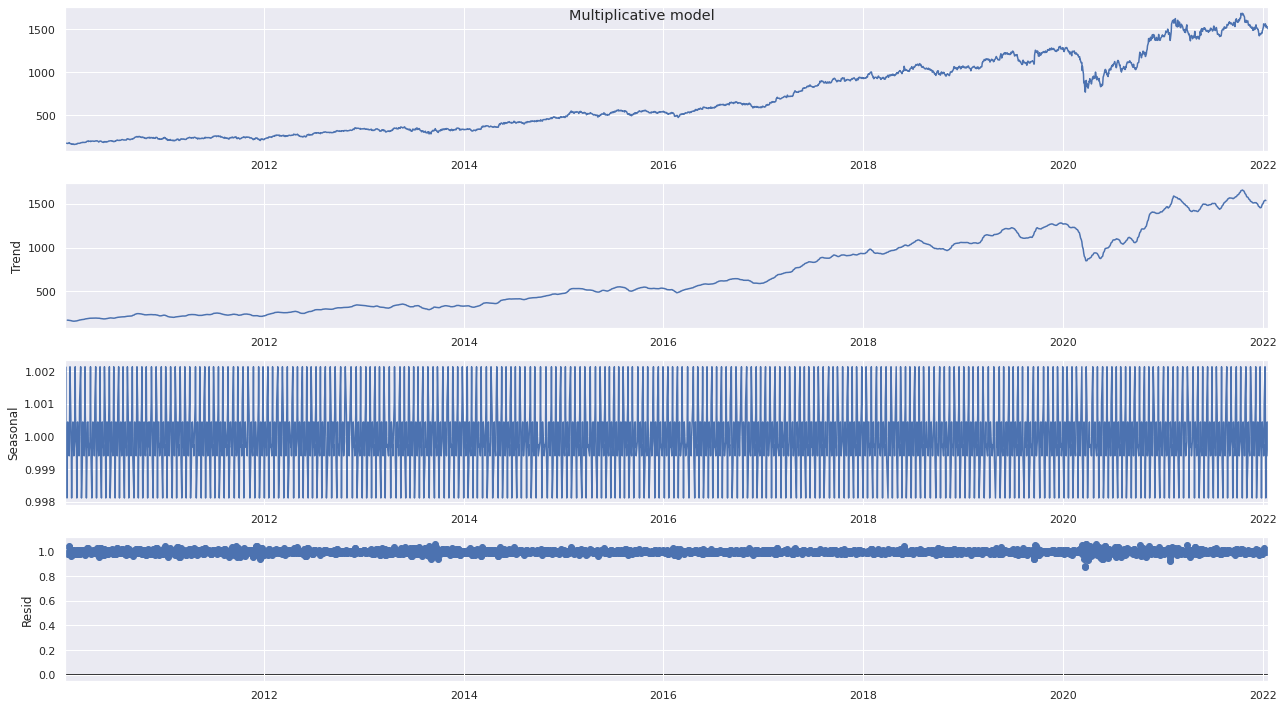

In [ ]:
multiplicative_decompose(df_close, '2010')

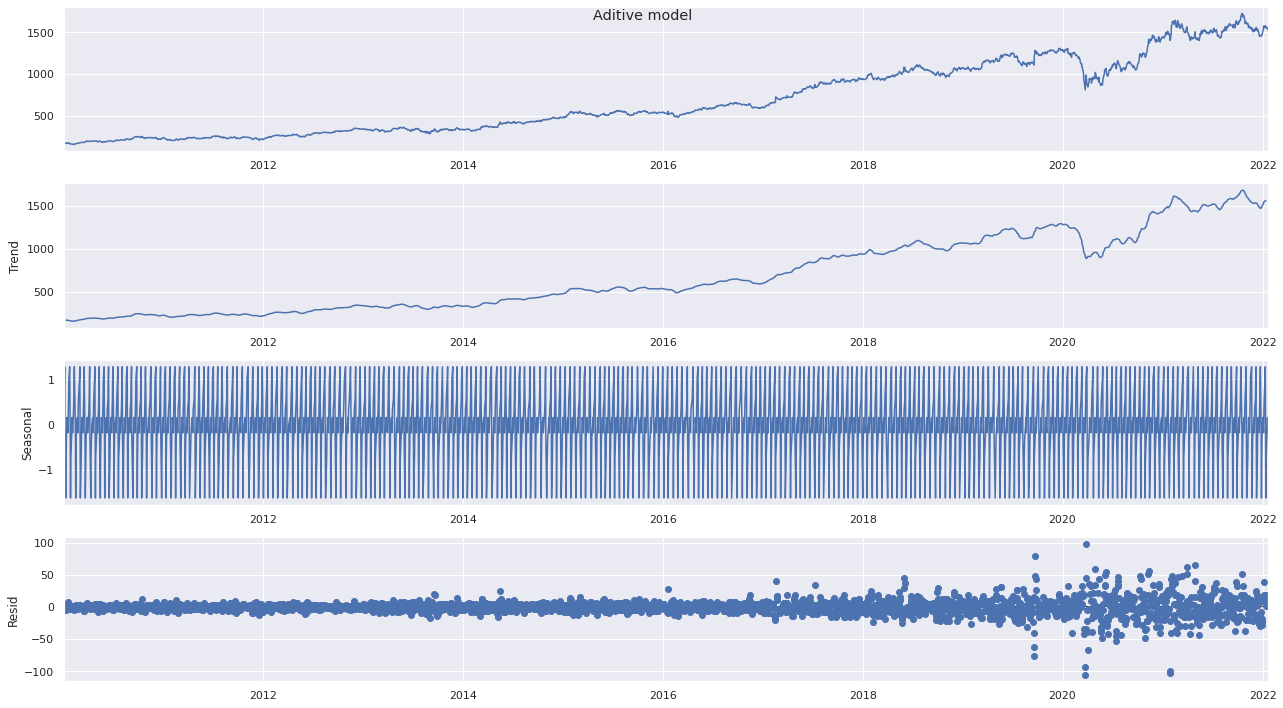

In [ ]:
additive_decompose(df_high, '2010')

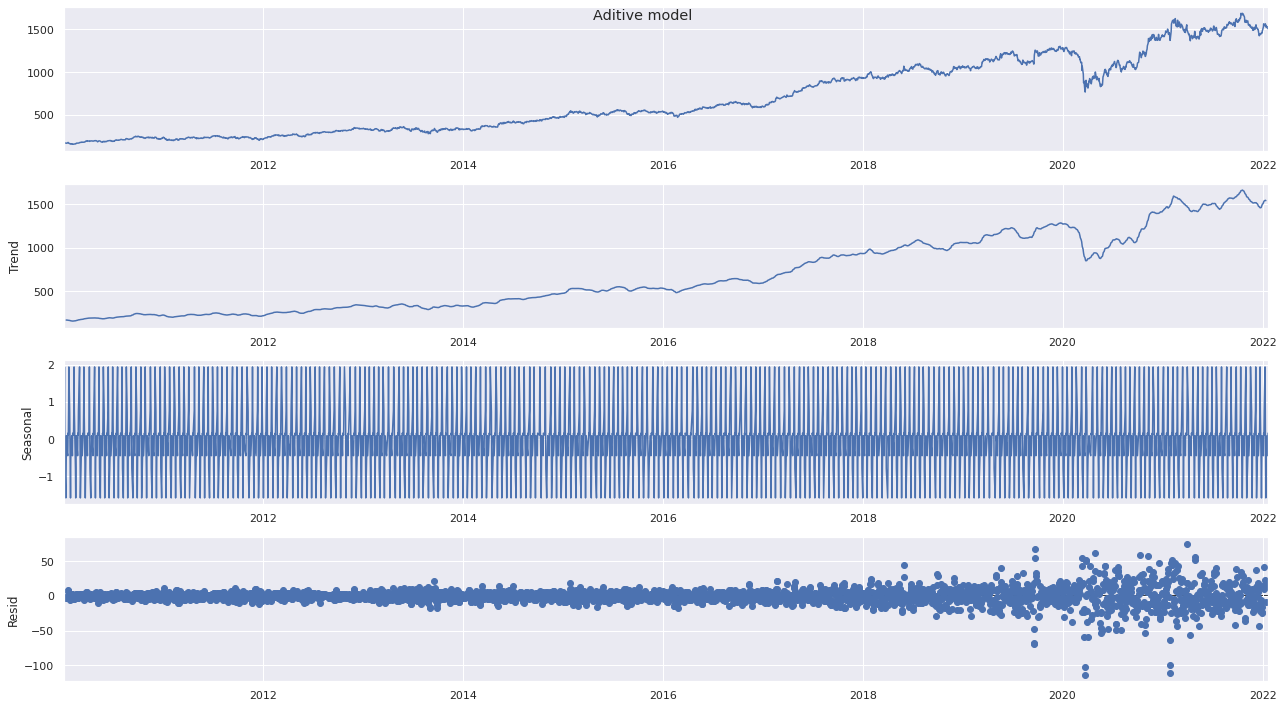

In [ ]:
additive_decompose(df_close, '2010')

In [ ]:
def smoothing_mean(data, year, title):
    plt.figure(figsize=(18, 8))
    plt.plot(data.loc[year:], color='steelblue')
    plt.plot(data.loc[year:].rolling(window=12).mean(), color='orange')
    plt.title(f'{title} Price of Stock', fontsize=16)
    plt.show()

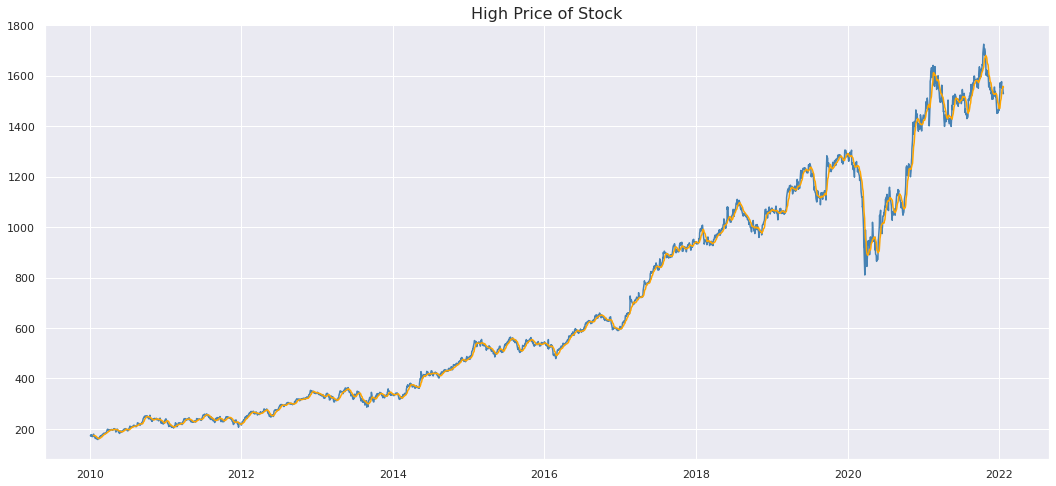

In [ ]:
smoothing_mean(df_high, '2010', 'High')

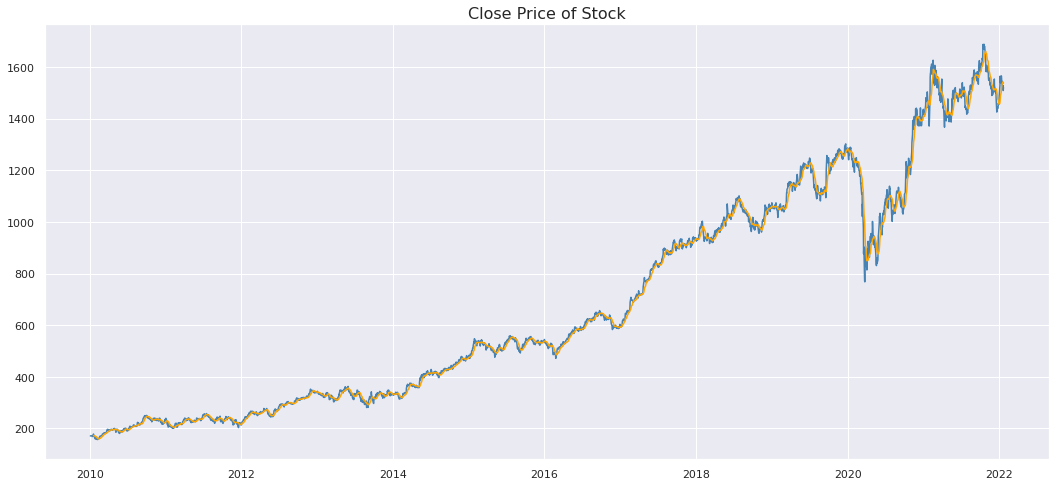

In [ ]:
smoothing_mean(df_close, '2010', 'Close')

## ARIMA MODEL

AutoRegressive Integrated Moving Average(ARIMA)  is a time series forecasting model that incorporates autocorrelation measures to model temporal structures within the time series data to predict future values. The autoregression part of the model measures the dependency of a particular sample with a few past observations. These differences are measured and integrated to make the data patterns stationary or minimize the obvious correlation with past data (since linear independence and no collinearity is one of the fundamental assumptions of the linear regression model). After this, a moving average helps condense and bring out significant features from the data.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


def autocorrelation(data, year):
    plot_acf(data.loc[year:])
    plt.show()


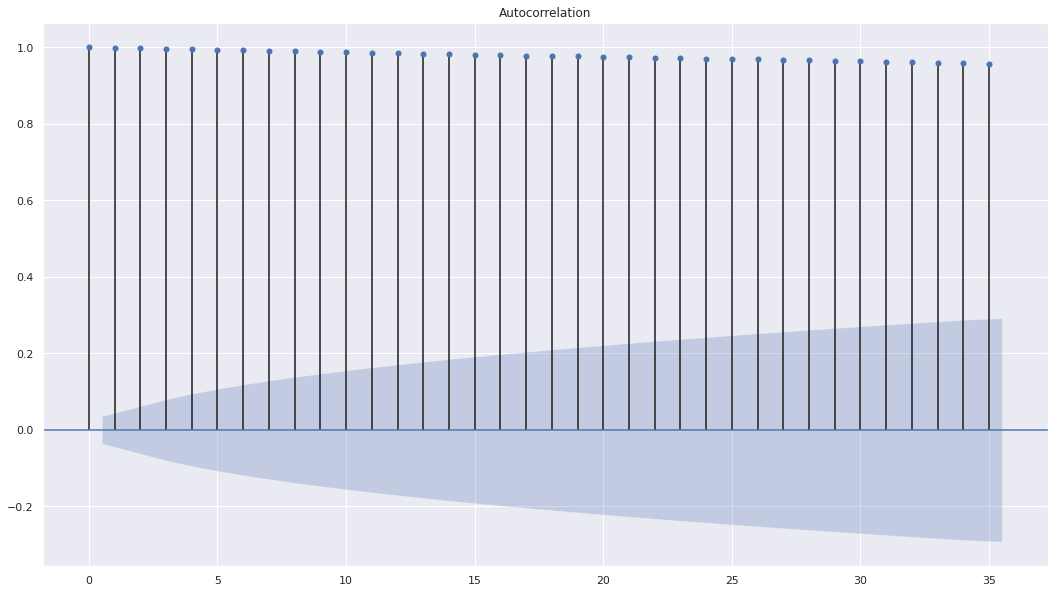

In [ ]:
autocorrelation(df_high, '2010')

In [ ]:
def acf_plot_with_one_diff(data, year):
    f = plt.figure()
    ax1 = f.add_subplot(121)
    ax1.set_title('1st Order Differencing')
    ax1.plot(data[year:].diff())

    ax2 = f.add_subplot(122)
    plot_acf(data[year:].diff().dropna(), ax=ax2)
    plt.show()


def acf_plot_with_two_diff(data, year):
    f = plt.figure()
    ax1 = f.add_subplot(121)
    ax1.set_title('2nd Order Differencing')
    ax1.plot(data[year:].diff())

    ax2 = f.add_subplot(122)
    plot_pacf(data[year:].diff().diff().dropna(), ax=ax2)
    plt.show()



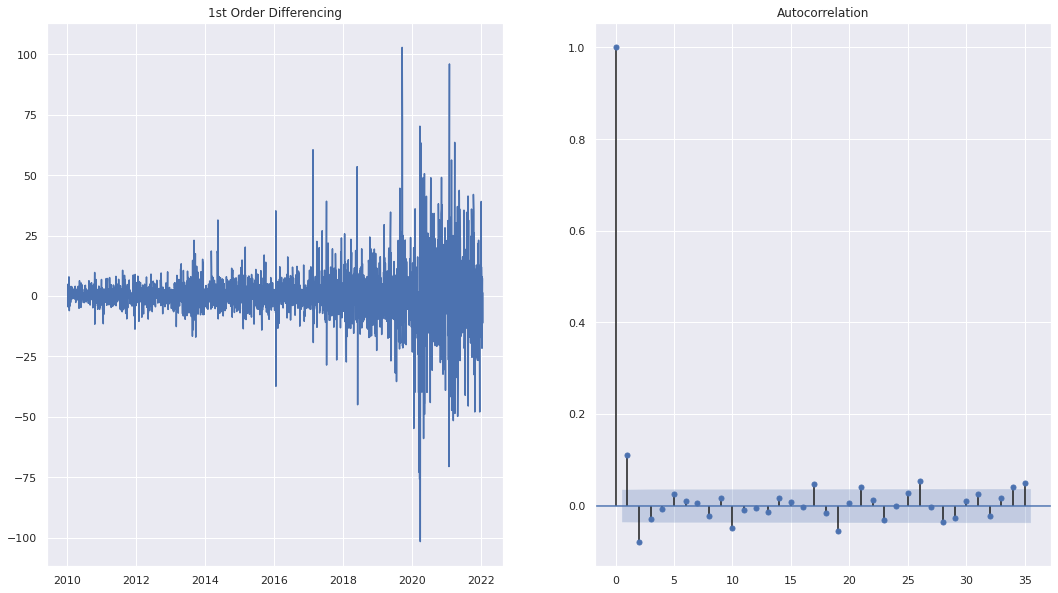

In [ ]:
acf_plot_with_one_diff(df_high, '2010')

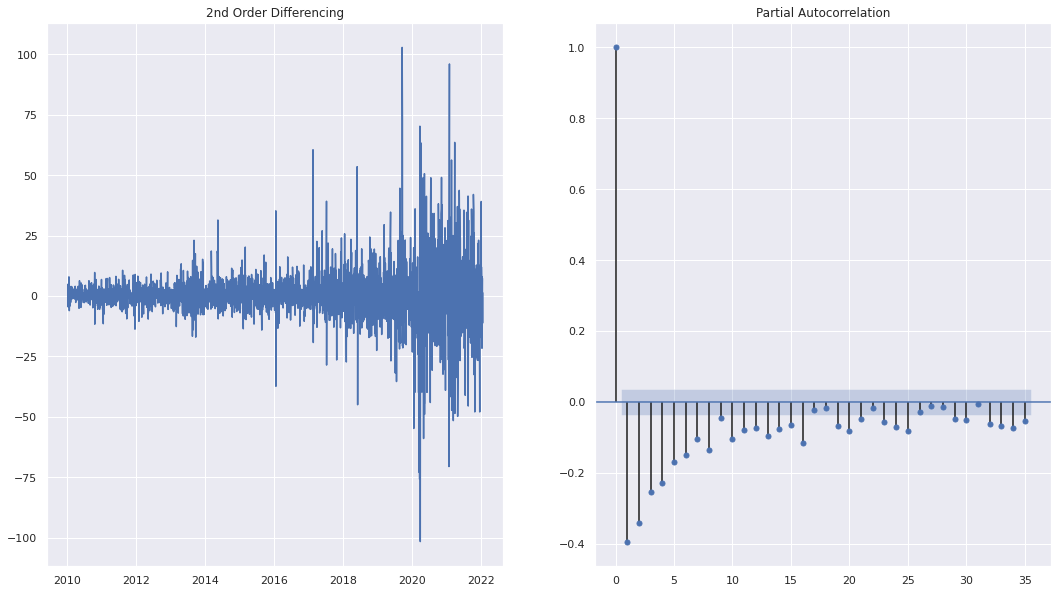

In [ ]:
acf_plot_with_two_diff(df_high, '2010')

In [ ]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(df_high['2010':].High.dropna())
print('p_value:', result[1])

result = adfuller(df_high['2010':].High.diff().dropna())
print('p_value:', result[1])

result = adfuller(df_high['2010':].High.diff().diff().dropna())
print('p_value:', result[1])

p_value: 0.9709390574010901
p_value: 2.138826904590973e-24
p_value: 4.91961600529154e-30


In [ ]:
def pacf_plot_with_one_diff(data, year):
    f = plt.figure()
    ax1 = f.add_subplot(121)
    ax1.set_title('1st Order Differencing')
    ax1.plot(data[year:].diff())

    ax2 = f.add_subplot(122)
    plot_pacf(data[year:].diff().dropna(), ax=ax2)
    plt.show()


def pacf_plot_with_two_diff(data, year):
    f = plt.figure()
    ax1 = f.add_subplot(121)
    ax1.set_title('2nd Order Differencing')
    ax1.plot(data[year:].diff())

    ax2 = f.add_subplot(122)
    plot_pacf(data[year:].diff().diff().dropna(), ax=ax2)
    plt.show()


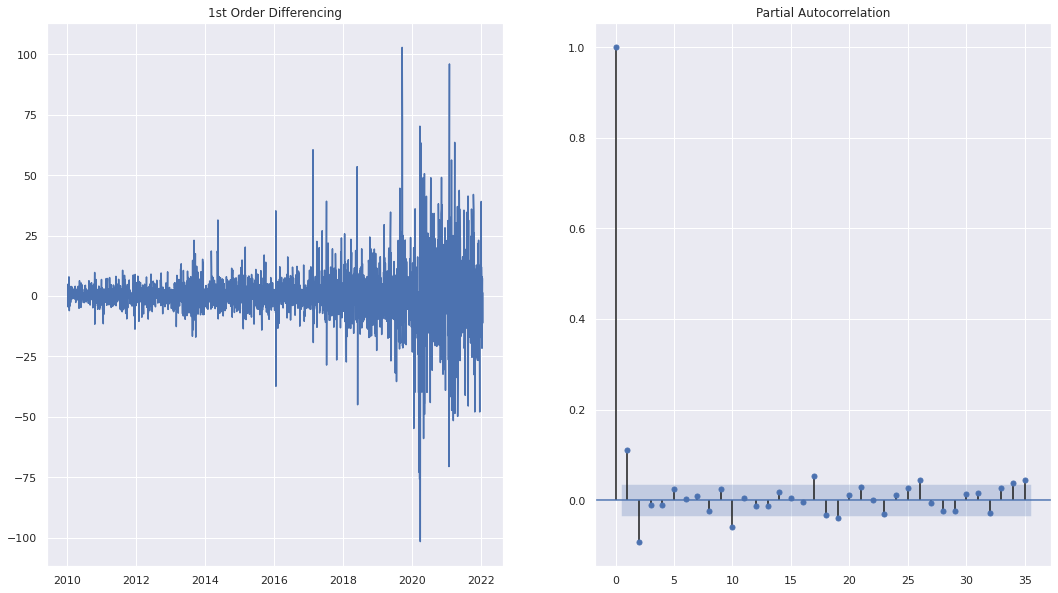

In [ ]:
pacf_plot_with_one_diff(df_high, '2010')

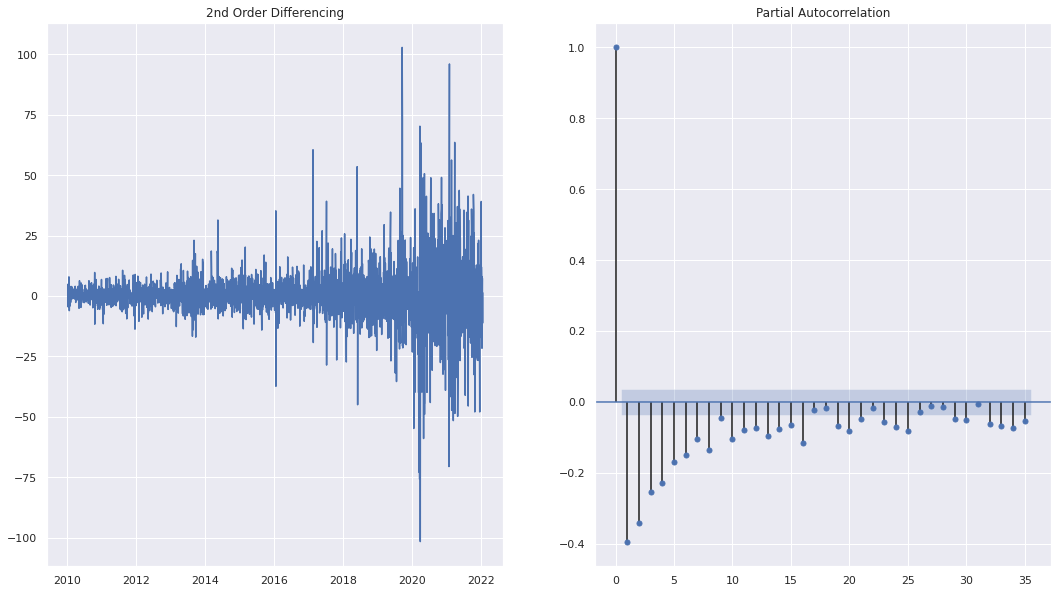

In [ ]:
pacf_plot_with_two_diff(df_high, '2010')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


arima_model = ARIMA(df_high['2010':], order=(4, 1, 4))
model = arima_model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 2975
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -11343.380
Method:                       css-mle   S.D. of innovations             10.956
Date:                Mon, 14 Nov 2022   AIC                          22706.761
Time:                        07:10:53   BIC                          22766.741
Sample:                             1   HQIC                         22728.345
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4564      0.219      2.085      0.037       0.027       0.885
ar.L1.D.High     0.4218      0.169      2.492      0.013       0.090       0.753
ar.L2.D.High     0.4860      0.140      3.46

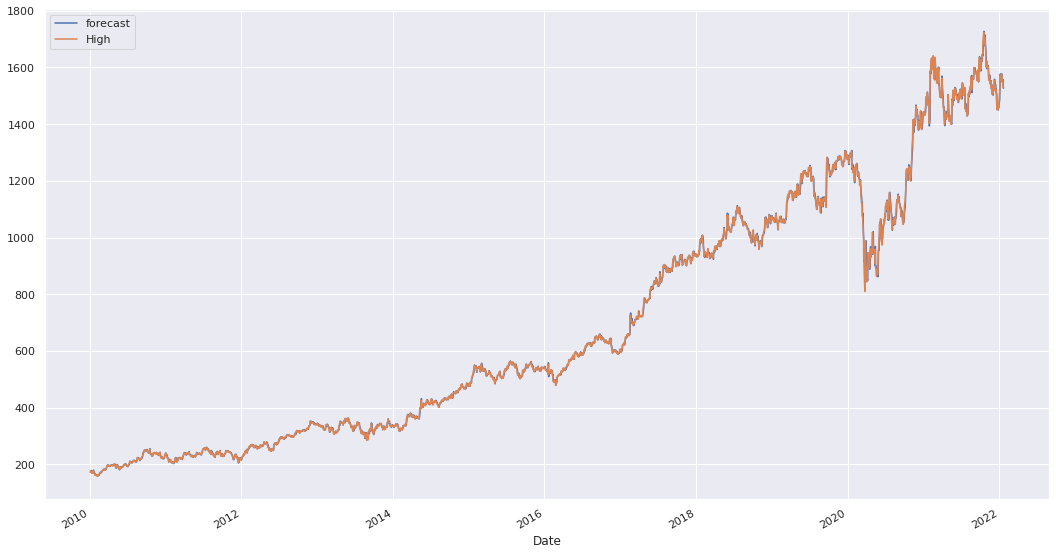

In [ ]:
model.plot_predict(dynamic=False)
plt.show()

In [ ]:
arima_model1 = ARIMA(df_high['2010':].High[:2380], order=(4, 1, 4))
model1 = arima_model1.fit(disp=0)
print(model1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 2379
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -7734.534
Method:                       css-mle   S.D. of innovations              6.246
Date:                Mon, 14 Nov 2022   AIC                          15489.069
Time:                        07:17:32   BIC                          15546.813
Sample:                             1   HQIC                         15510.085
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4013      0.129      3.106      0.002       0.148       0.655
ar.L1.D.High     0.3509      0.015     22.688      0.000       0.321       0.381
ar.L2.D.High     0.1222      0.017      7.08

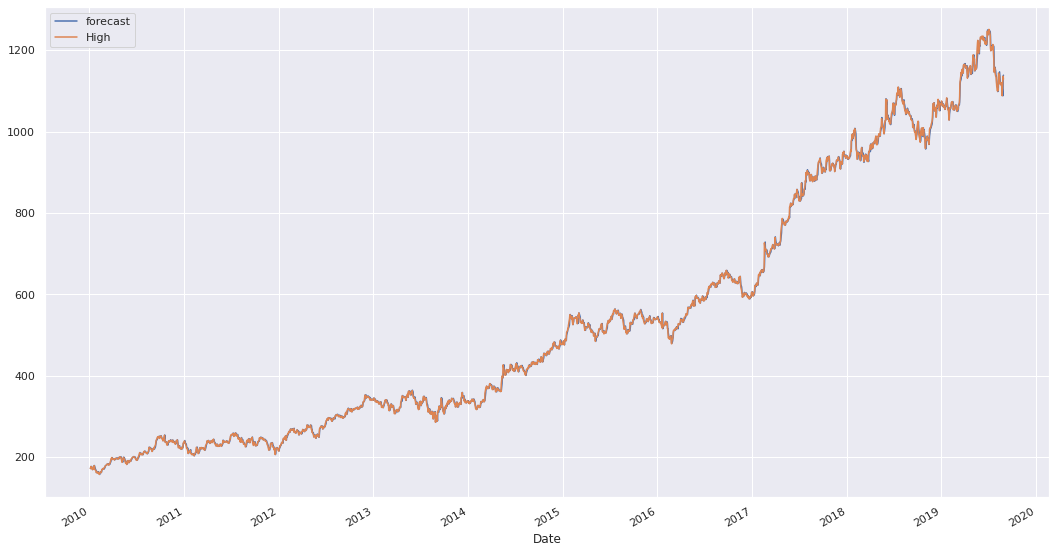

In [ ]:
model1.plot_predict(dynamic=False)
plt.show()

In [ ]:
y_pred = pd.Series(model1.forecast(596)[0], index=df_high['2010':].High[2380:].index)
y_true = df_high['2010':].High[2380:]


print(np.array(y_pred))
print(np.array(y_true))

[1130.33347932 1133.32446756 1132.71788159 1131.35362192 1130.56313778
 1127.5438776  1127.0505321  1128.06844144 1128.71919957 1132.31078468
 1134.90348827 1135.94357789 1137.53308125 1136.00395649 1133.9526902
 1132.99186008 1130.90614724 1131.40527955 1133.49628276 1135.08266193
 1138.52700576 1140.54267389 1140.60474909 1140.8374473  1138.68501367
 1136.51726195 1135.98189659 1135.1533414  1136.71092096 1139.56381423
 1141.50657441 1144.27050588 1145.29650288 1144.29996465 1143.49782348
 1141.21693299 1139.51890375 1139.84717107 1140.33669212 1142.72369956
 1145.83032272 1147.51960599 1149.20124103 1149.09318633 1147.24805838
 1145.93577362 1144.08037163 1143.31105071 1144.68366233 1146.26864534
 1149.03094248 1151.81631135 1152.75572837 1153.19147855 1152.09938634
 1149.84568122 1148.62541352 1147.6619229  1148.04338687 1150.34875437
 1152.57488085 1155.15596955 1157.1229584  1157.04407874 1156.35267783
 1154.67478069 1152.5661153  1151.9738102  1152.16059801 1153.62842372
 1156.5

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import pprint


def errors_and_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mpe = np.mean((y_pred - y_true)/y_true)
    rmse = np.mean((y_pred - y_true)**2)**.5
    corr = np.corrcoef(y_pred, y_true)[0, 1]

    mins = np.amin(np.hstack([y_pred[:,None], y_true[:, None]]), axis=1)
    maxs = np.amax(np.hstack([y_pred[:,None], y_true[:, None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)

    n = np.array(df_high['2010':].High[:2380]).shape[0]
    d = np.abs(np.diff(np.array(df_high['2010':].High[:2380]))).sum()/(n-1)
    errors = np.abs(y_true - y_pred)

    print('MASE:', errors.mean()/d)
    print(f'MAPE: {mape}\n', f'MAE: {mae}\n', f'MPE: {mpe}\n', f'RMSE: {rmse}\n', f'CORR: {corr}\n', f'MINMAX: {minmax}')


In [ ]:
errors_and_accuracy(y_true, y_pred)

MASE: 41.028045844140586
MAPE: 0.12840998307690768
 MAE: 168.06038191891037
 MPE: -0.038253442383627684
 RMSE: 187.3187647976347
 CORR: 0.7487109906212064
 MINMAX: 0.12029775699394096


## SARIMAX MODEL

In [ ]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

The series is stationary


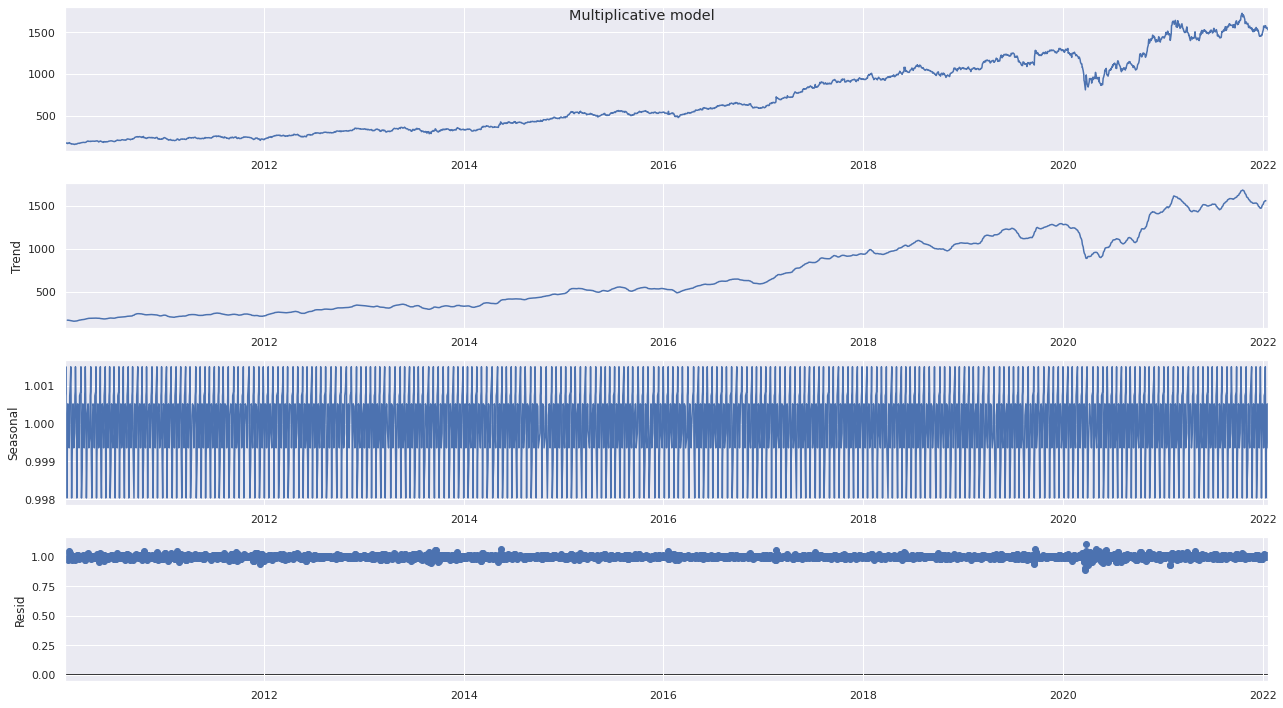

In [ ]:
seasonal = multiplicative_decompose(df_high, '2010').seasonal
check_stationarity(seasonal)

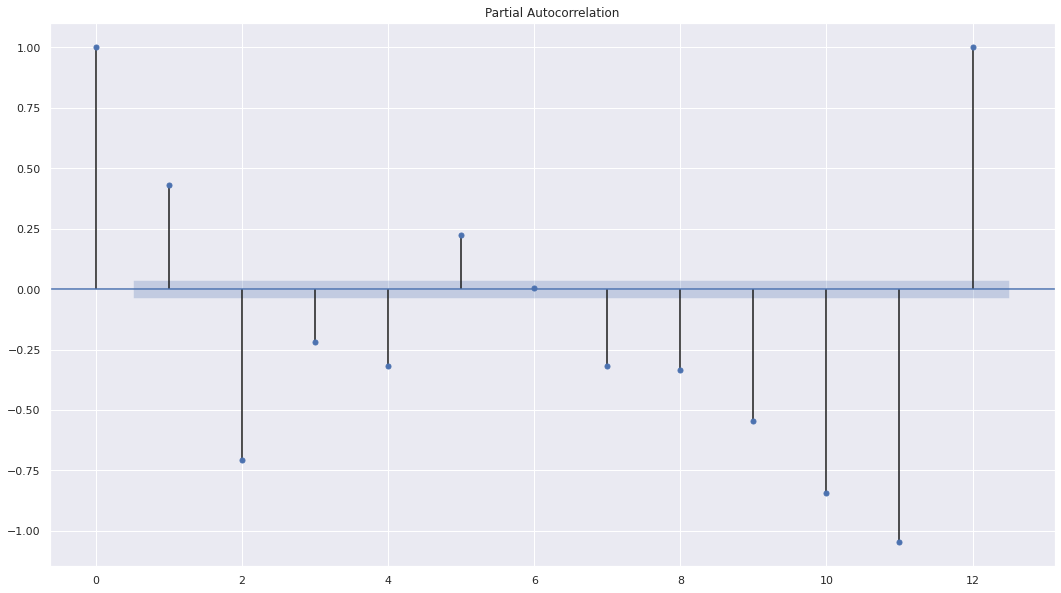

In [ ]:
plot_pacf(seasonal, lags =12)
plt.show()

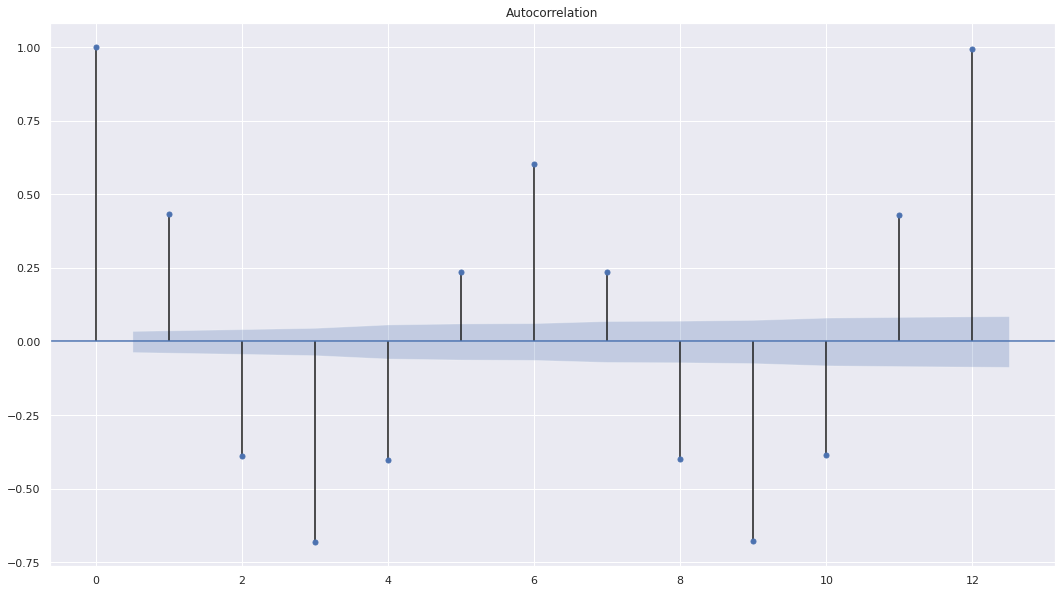

In [ ]:
plot_acf(seasonal, lags=12)
plt.show()

In [ ]:
ts_train = df_high['2010':].High[:2380]
ts_test = df_high['2010':].High[2380:]
print(ts_train)

Date
2010-01-04     172.850006
2010-01-05     172.500000
2010-01-06     172.000000
2010-01-07     176.839996
2010-01-08     172.339996
                 ...     
2019-08-22    1110.425049
2019-08-23    1088.500000
2019-08-26    1133.074951
2019-08-27    1136.449951
2019-08-28    1128.675049
Name: High, Length: 2380, dtype: float64


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_seasonal = SARIMAX(df_high['2010':], order=(1, 2, 2), seasonal_order=(1, 2, 2, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit_seasonal = model_seasonal.fit()
print(model_fit_seasonal.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               High   No. Observations:                 2976
Model:             SARIMAX(1, 2, 2)x(1, 2, 2, 12)   Log Likelihood              -11285.677
Date:                            Mon, 14 Nov 2022   AIC                          22585.355
Time:                                    05:53:02   BIC                          22627.217
Sample:                                         0   HQIC                         22600.433
                                           - 2976                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1271      0.073      1.734      0.083      -0.017       0.271
ma.L1         -1.0139      0.075   

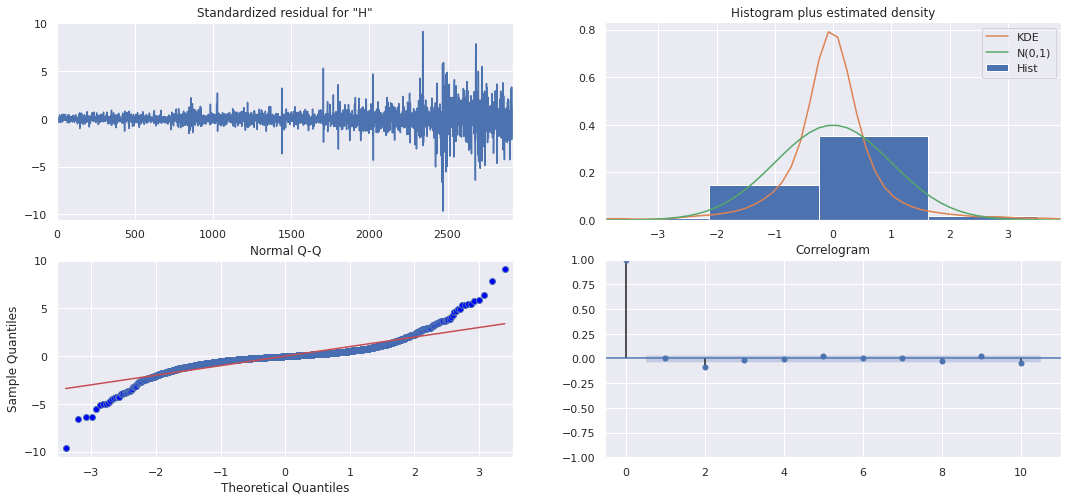

In [ ]:
model_fit_seasonal.plot_diagnostics(figsize=(18, 8))
plt.show()

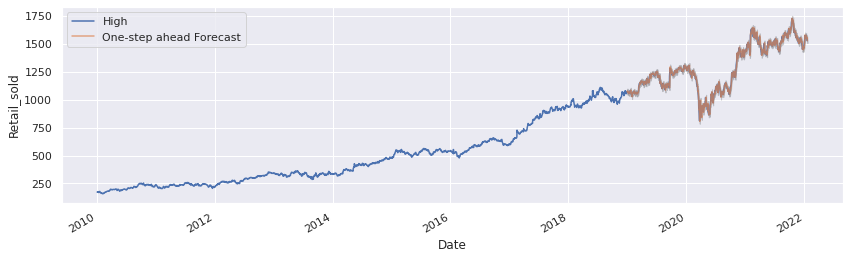

In [ ]:
pred = model_fit_seasonal.get_prediction(start=pd.to_datetime('2019'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_high['2010':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean.to_frame().to_numpy()
y_truth = df_high['2019':].to_numpy()

In [ ]:
y_forecasted

array([[1070.71954719],
       [1077.57278381],
       [1073.72379698],
       [1063.47169402],
       [1066.07631862],
       [1068.12787339],
       [1059.61306508],
       [1061.91954589],
       [1062.82243071],
       [1063.69215849],
       [1053.81216854],
       [1064.23360985],
       [1064.74258531],
       [1069.7354669 ],
       [1069.6379552 ],
       [1085.3632701 ],
       [1074.1211139 ],
       [1067.20775587],
       [1058.51187863],
       [1055.68196104],
       [1051.25447577],
       [1041.83672055],
       [1026.84402714],
       [1046.67032422],
       [1062.47229734],
       [1057.37855115],
       [1059.98071262],
       [1064.18915752],
       [1066.87690996],
       [1073.16677359],
       [1069.79699885],
       [1075.62707528],
       [1070.10709747],
       [1053.44349285],
       [1059.64175603],
       [1053.64036983],
       [1057.91954041],
       [1061.61416926],
       [1064.69667053],
       [1065.30979924],
       [1063.98428338],
       [1061.931

In [ ]:
y_truth

array([[1075.5     ],
       [1073.75    ],
       [1064.125   ],
       [1064.25    ],
       [1067.675049],
       [1061.75    ],
       [1060.675049],
       [1061.900024],
       [1062.      ],
       [1054.949951],
       [1063.25    ],
       [1062.5     ],
       [1067.949951],
       [1069.5     ],
       [1083.25    ],
       [1073.400024],
       [1067.925049],
       [1060.824951],
       [1055.      ],
       [1051.025024],
       [1041.5     ],
       [1028.625   ],
       [1044.875   ],
       [1058.5     ],
       [1056.5     ],
       [1059.5     ],
       [1063.5     ],
       [1065.      ],
       [1072.474976],
       [1071.449951],
       [1074.      ],
       [1070.      ],
       [1054.050049],
       [1059.      ],
       [1054.074951],
       [1055.5     ],
       [1059.974976],
       [1064.050049],
       [1064.974976],
       [1062.5     ],
       [1062.224976],
       [1052.925049],
       [1050.449951],
       [1055.550049],
       [1055.150024],
       [10

In [ ]:
errors_and_accuracy(y_truth, y_forecasted)

MASE: 3.367758060237281
MAPE: 0.01105866746229039
 MAE: 13.795117319602916
 MPE: 0.00013909041505856843
 RMSE: 19.565508015524905
 CORR: nan
 MINMAX: 0.01092657760476401


## FACEBOOK PROPHET MODEL

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [ ]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet.plot import plot_plotly
import plotly.offline as pl
pl.init_notebook_mode()

In [ ]:
dt_high = pd.DataFrame()
dt_high['Date'] = stock_of_bank['Date']
dt_high['High'] = stock_of_bank['High']

In [ ]:
dt_high[3586:].head()

Date        High
3586 2010-01-06  172.000000
3587 2010-01-07  176.839996
3588 2010-01-08  172.339996
3589 2010-01-11  174.865005
3590 2010-01-12  171.179993

In [ ]:
ds = dt_high[3586:].rename(columns={'Date': 'ds', 'High': 'y'})

print(ds)

             ds            y
3586 2010-01-06   172.000000
3587 2010-01-07   176.839996
3588 2010-01-08   172.339996
3589 2010-01-11   174.865005
3590 2010-01-12   171.179993
...         ...          ...
6562 2022-01-17  1556.000000
6563 2022-01-18  1550.900024
6564 2022-01-19  1539.750000
6565 2022-01-20  1528.500000
6566 2022-01-21  1529.800049

[2974 rows x 2 columns]


In [ ]:
my_model = prophet.Prophet(interval_width=0.95, daily_seasonality=True)
modelp = my_model.fit(ds)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0lwc406/b2jfn3j1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0lwc406/v6qoprjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13446', 'data', 'file=/tmp/tmpw0lwc406/b2jfn3j1.json', 'init=/tmp/tmpw0lwc406/v6qoprjj.json', 'output', 'file=/tmp/tmpw0lwc406/prophet_model18zfsxww/prophet_model-20221114071025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = my_model.make_future_dataframe(periods=500, freq='D')
forecast = my_model.predict(future)

In [ ]:
forecast.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2010-01-06  177.221325   62.621581  318.161574   177.221325   177.221325   
1 2010-01-07  177.325121   66.566929  338.745111   177.325121   177.325121   
2 2010-01-08  177.428917   51.902546  330.449234   177.428917   177.428917   
3 2010-01-11  177.740306   41.519320  329.104599   177.740306   177.740306   
4 2010-01-12  177.844102   53.698486  332.722935   177.844102   177.844102   

   additive_terms  additive_terms_lower  additive_terms_upper      daily  ...  \
0       10.892422             10.892422             10.892422  23.772708  ...   
1       13.394396             13.394396             13.394396  23.772708  ...   
2       13.017977             13.017977             13.017977  23.772708  ...   
3       14.262422             14.262422             14.262422  23.772708  ...   
4       13.579977             13.579977             13.579977  23.772708  ...   

      weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0 -18.029555    -18.029555    -18.029555  5.149269      5.149269   
1 -16.037948    -16.037948    -16.037948  5.659636      5.659636   
2 -16.891376    -16.891376    -16.891376  6.136645      6.136645   
3 -16.829930    -16.829930    -16.829930  7.319643      7.319643   
4 -17.815293    -17.815293    -17.815293  7.622562      7.622562   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0      5.149269                   0.0                         0.0   
1      5.659636                   0.0                         0.0   
2      6.136645                   0.0                         0.0   
3      7.319643                   0.0                         0.0   
4      7.622562                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  188.113747  
1                         0.0  190.719518  
2                         0.0  190.446894  
3                         0.0  192.002727  
4                         0.0  191.424079  

[5 rows x 22 columns]

In [ ]:
forecast.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
3469 2023-06-01  1836.462417  1652.836158  2038.181449  1698.197139   
3470 2023-06-02  1837.005148  1654.594079  2047.744584  1698.431030   
3471 2023-06-03  1837.547879  1676.925964  2061.554705  1698.664920   
3472 2023-06-04  1838.090609  1751.084652  2148.286226  1698.898811   
3473 2023-06-05  1838.633340  1661.723086  2048.778853  1699.132701   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
3469  2000.006644        6.849349              6.849349              6.849349   
3470  2000.935941        6.518493              6.518493              6.518493   
3471  2001.865238       30.478424             30.478424             30.478424   
3472  2002.794535      103.068414            103.068414            103.068414   
3473  2003.723833        7.487918              7.487918              7.487918   

          daily  ...     weekly  weekly_lower  weekly_upper    yearly  \
3469  23.772708  ... -16.037948    -16.037948    -16.037948 -0.885411   
3470  23.772708  ... -16.891376    -16.891376    -16.891376 -0.362839   
3471  23.772708  ...   6.657647      6.657647      6.657647  0.048070   
3472  23.772708  ...  78.946455     78.946455     78.946455  0.349251   
3473  23.772708  ... -16.829930    -16.829930    -16.829930  0.545139   

      yearly_lower  yearly_upper  multiplicative_terms  \
3469     -0.885411     -0.885411                   0.0   
3470     -0.362839     -0.362839                   0.0   
3471      0.048070      0.048070                   0.0   
3472      0.349251      0.349251                   0.0   
3473      0.545139      0.545139                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper         yhat  
3469                         0.0                         0.0  1843.311766  
3470                         0.0                         0.0  1843.523641  
3471                         0.0                         0.0  1868.026303  
3472                         0.0                         0.0  1941.159023  
3473                         0.0                         0.0  1846.121258  

[5 rows x 22 columns]

In [ ]:
forecast[['ds', 'yhat']]

ds         yhat
0    2010-01-06   188.113747
1    2010-01-07   190.719518
2    2010-01-08   190.446894
3    2010-01-11   192.002727
4    2010-01-12   191.424079
...         ...          ...
3469 2023-06-01  1843.311766
3470 2023-06-02  1843.523641
3471 2023-06-03  1868.026303
3472 2023-06-04  1941.159023
3473 2023-06-05  1846.121258

[3474 rows x 2 columns]

In [ ]:
ds

ds            y
3586 2010-01-06   172.000000
3587 2010-01-07   176.839996
3588 2010-01-08   172.339996
3589 2010-01-11   174.865005
3590 2010-01-12   171.179993
...         ...          ...
6562 2022-01-17  1556.000000
6563 2022-01-18  1550.900024
6564 2022-01-19  1539.750000
6565 2022-01-20  1528.500000
6566 2022-01-21  1529.800049

[2974 rows x 2 columns]

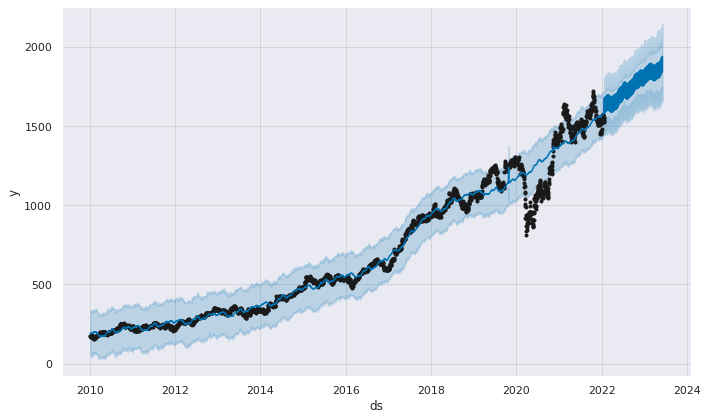

In [ ]:
plot1 = my_model.plot(forecast)

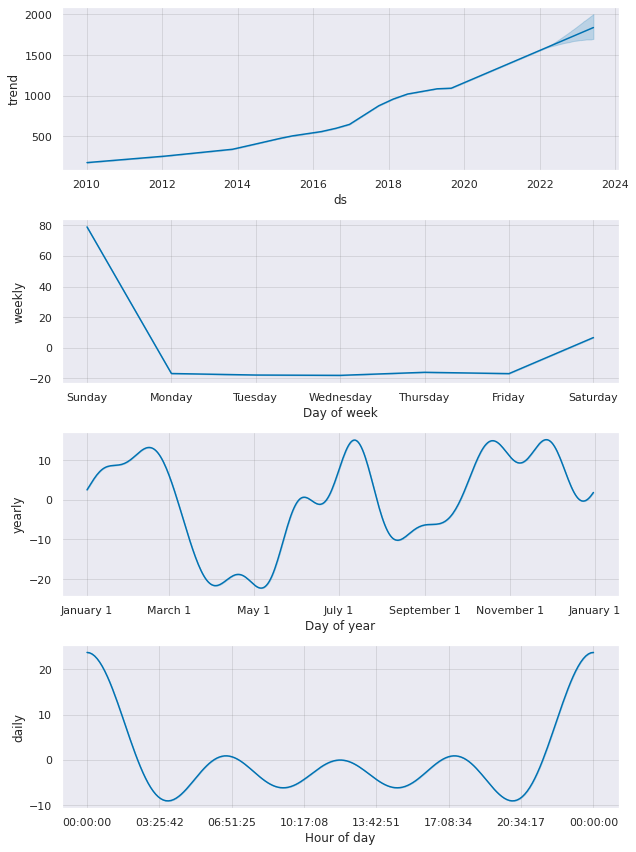

In [ ]:
plot2 = my_model.plot_components(forecast)

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(my_model, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0lwc406/wt38f_vd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0lwc406/gx5bq9hd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8165', 'data', 'file=/tmp/tmpw0lwc406/wt38f_vd.json', 'init=/tmp/tmpw0lwc406/gx5bq9hd.json', 'output', 'file=/tmp/tmpw0lwc406/prophet_modelozukzo5z/prophet_model-20221114071031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0lwc406/if1ss2ne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0lwc406/gy7lkhmc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv2)
df_p.head()

horizon         mse       rmse        mae      mape     mdape     smape  \
0 36 days  768.900425  27.729054  24.028274  0.073767  0.071968  0.072207   
1 37 days  796.562807  28.223444  24.423022  0.074658  0.074257  0.073253   
2 38 days  873.929339  29.562296  25.788617  0.078674  0.081436  0.077224   
3 39 days  936.705914  30.605652  26.908259  0.081841  0.084009  0.080399   
4 40 days  967.738886  31.108502  27.472585  0.083170  0.087401  0.081907   

   coverage  
0  0.342466  
1  0.342466  
2  0.315068  
3  0.296804  
4  0.278539

## XGBOOST REGRESSION

XGBoost is an efficient implementation of gradient boosting for classification and regression problems.

It is both fast and efficient, performing well, if not the best, on a wide range of predictive modeling tasks and is a favorite among data science competition winners, such as those on Kaggle.

XGBoost can also be used for time series forecasting, although it requires that the time series dataset be transformed into a supervised learning problem first. It also requires the use of a specialized technique for evaluating the model called walk-forward validation, as evaluating the model using k-fold cross validation would result in optimistically biased results.



In [ ]:
!pip install xgboost==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.7 MB 10 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import xgboost as xg

In [ ]:
train_d = df_high['2006':].loc[df_high['2006':].index <= '2021-05'].copy()
test_d = df_high['2006':].loc[df_high['2006':].index > '2021-05'].copy()
print(train_d)

                   High
Date                   
2006-01-02    71.995003
2006-01-03    71.800003
2006-01-04    73.504997
2006-01-05    74.300003
2006-01-06    77.500000
...                 ...
2021-04-26  1429.000000
2021-04-27  1442.000000
2021-04-28  1479.000000
2021-04-29  1503.650024
2021-04-30  1453.800049

[3777 rows x 1 columns]


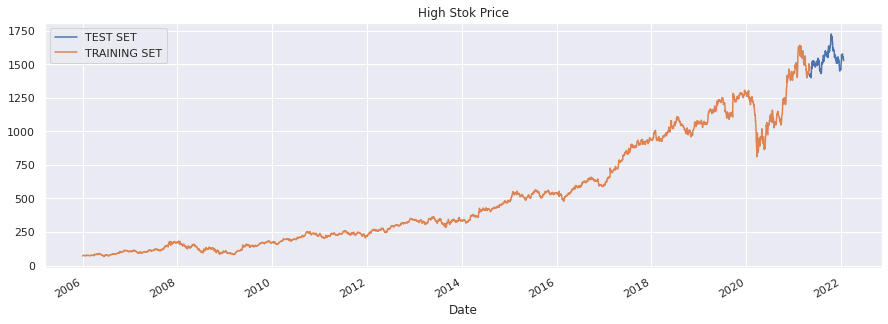

In [ ]:
test_and_train = test_d.rename(columns={'High': 'TEST SET'}).join(train_d.rename(columns={'High': 'TRAINING SET'}), how='outer').plot(figsize=(15,5), title='High Stok Price', style='-')

In [ ]:
def create_features(df, label=None):
    df = df.copy()
    df['date'] = df.index
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['quarter'] = df['date'].dt.quarter
    df['dayofweek'] = df['date'].dt.dayofweek
    return df

In [ ]:
train_d = create_features(train_d)
test_d = create_features(test_d)

In [ ]:
test_d.columns

Index(['High', 'date', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear', 'quarter', 'dayofweek'],
      dtype='object')

In [ ]:
FEATURES = ['month', 'year', 'dayofyear', 'dayofmonth', 'quarter', 'dayofweek', 'weekofyear']
TARGET = 'High'

In [ ]:
X_train = train_d[FEATURES]
y_train = train_d[TARGET]

X_test = test_d[FEATURES]
y_test = test_d[TARGET]

In [ ]:
xgb_model = xg.XGBRegressor(n_estimators=2000, early_stopping_rounds=50, learning_rate=1)
xgb_model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:43.53274	validation_1-rmse:75.94365
[100]	validation_0-rmse:1.61474	validation_1-rmse:106.69051
[200]	validation_0-rmse:0.50020	validation_1-rmse:106.65435
[300]	validation_0-rmse:0.19897	validation_1-rmse:106.61513
[400]	validation_0-rmse:0.07734	validation_1-rmse:106.64228
[500]	validation_0-rmse:0.02993	validation_1-rmse:106.63863
[600]	validation_0-rmse:0.01149	validation_1-rmse:106.63710
[700]	validation_0-rmse:0.00461	validation_1-rmse:106.63929
[800]	validation_0-rmse:0.00276	validation_1-rmse:106.63879
[900]	validation_0-rmse:0.00276	validation_1-rmse:106.63879
[1000]	validation_0-rmse:0.00276	validation_1-rmse:106.63879
[1100]	validation_0-rmse:0.00276	validation_1-rmse:106.63879
[1200]	validation_0-rmse:0.00276	validation_1-rmse:106.63879
[1300]	validation_0-rmse:0.00276	validation_1-rmse:106.63879
[1400]	validation_0-rmse:0.00276	validation_1-rmse:106.63879
[1500]	validation_0-rmse:0.00276	validation_1-rmse:106.63879
[1600]	validation_0-rmse:0.00276	val

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=2000, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [ ]:
xgb_model.predict(X_test)

array([1439.3966, 1475.3131, 1472.5853, 1483.8022, 1474.5564, 1449.52  ,
       1424.604 , 1419.092 , 1432.8906, 1472.4607, 1466.123 , 1458.082 ,
       1473.0255, 1455.979 , 1410.9021, 1431.7015, 1425.6515, 1441.9219,
       1477.9126, 1526.5922, 1445.8624, 1453.0854, 1466.8231, 1493.8153,
       1484.4049, 1504.1581, 1488.851 , 1487.9933, 1431.6599, 1415.7671,
       1437.6257, 1453.9335, 1466.232 , 1499.836 , 1478.9342, 1489.2008,
       1494.357 , 1493.4391, 1438.2179, 1476.4541, 1486.3481, 1469.5365,
       1488.2551, 1507.6742, 1479.3712, 1512.6044, 1513.3767, 1519.2799,
       1523.6399, 1466.5846, 1464.8982, 1458.8744, 1483.6772, 1484.4468,
       1532.2804, 1530.8165, 1522.0878, 1523.6542, 1497.3671, 1502.9208,
       1510.569 , 1495.1929, 1485.9873, 1474.4099, 1470.2627, 1467.3488,
       1489.0054, 1486.082 , 1447.8458, 1437.8849, 1423.9141, 1447.2264,
       1434.8157, 1452.0018, 1448.8635, 1449.6138, 1464.6356, 1467.229 ,
       1502.5233, 1511.9816, 1491.3556, 1497.2018, 

In [ ]:
test_d['prediction'] = xgb_model.predict(X_test)

In [ ]:
test_d

High       date  month  year  dayofyear  dayofmonth  \
Date                                                                     
2021-05-03  1421.900024 2021-05-03      5  2021        123           3   
2021-05-04  1423.000000 2021-05-04      5  2021        124           4   
2021-05-05  1409.599976 2021-05-05      5  2021        125           5   
2021-05-06  1410.800049 2021-05-06      5  2021        126           6   
2021-05-07  1424.949951 2021-05-07      5  2021        127           7   
...                 ...        ...    ...   ...        ...         ...   
2022-01-17  1556.000000 2022-01-17      1  2022         17          17   
2022-01-18  1550.900024 2022-01-18      1  2022         18          18   
2022-01-19  1539.750000 2022-01-19      1  2022         19          19   
2022-01-20  1528.500000 2022-01-20      1  2022         20          20   
2022-01-21  1529.800049 2022-01-21      1  2022         21          21   

            weekofyear  quarter  dayofweek   prediction  
Date                                                     
2021-05-03          18        2          0  1439.396606  
2021-05-04          18        2          1  1475.313110  
2021-05-05          18        2          2  1472.585327  
2021-05-06          18        2          3  1483.802246  
2021-05-07          18        2          4  1474.556396  
...                ...      ...        ...          ...  
2022-01-17           3        1          0  1501.523438  
2022-01-18           3        1          1  1500.835205  
2022-01-19           3        1          2  1513.946167  
2022-01-20           3        1          3  1502.578979  
2022-01-21           3        1          4  1489.162354  

[183 rows x 10 columns]

In [ ]:
df_h = pd.DataFrame()
df_h = df_high['2006':].merge(test_d[['prediction']], how='left', left_index=True, right_index=True)

Text(0.5, 1.0, 'True Data & Pred Data')

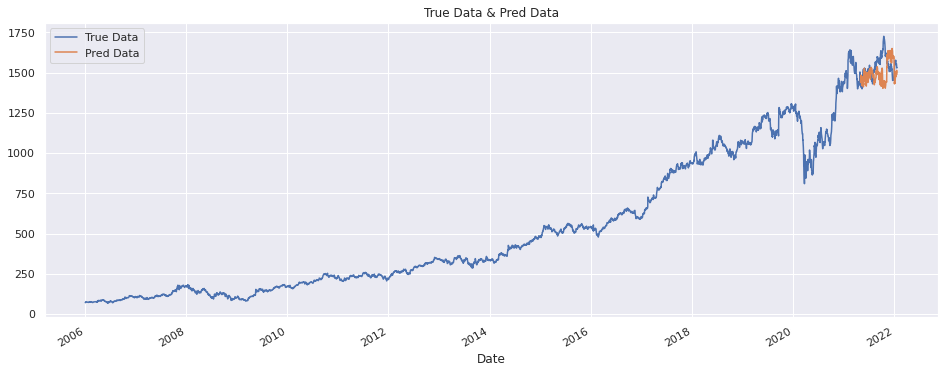

In [ ]:
ax = df_h[['High']].plot(figsize=(16, 6))
df_h['prediction'].plot(ax=ax, style='-')
plt.legend(['True Data', 'Pred Data'])
ax.set_title('True Data & Pred Data')

In [ ]:
errors_and_accuracy(test_d[TARGET], test_d['prediction'])

MASE: 20.703507365028507
MAPE: 0.05421947929248006
 MAE: 84.80636314109462
 MPE: -0.022754927031800463
 RMSE: 106.6387986015836
 CORR: -0.22805482287094692
 MINMAX: 0.053251594205658614


## SARIMAX MODEL IS MORE SUITABLE

SARIMAX is most suitable model for forecasting this data, as SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model. we can say SARIMAX is a seasonal equivalent model like SARIMA and Auto ARIMA. it can also deal with external effects. This feature of the model differs from other models.

In [ ]:
from pandas.tseries.offsets import DateOffset


def predict_periods(period):
    future_dates = [df_high['2010':].index[-1] + DateOffset(days = x) for x in range(0,period)]
    future_data_df = pd.DataFrame(index = future_dates[1:], columns = df_high['2010':].columns)
    p_data = pd.DataFrame(model_fit_seasonal.predict(start=len(df_high['2010':]), end=(len(df_high['2010':]) - 2) + period, dynamic= True).tolist(), index = future_dates[1:], columns=['Forecast'])
    future_data_df['Forecast'] = p_data['Forecast']
    all_data = pd.concat([df_high['2010':], future_data_df['Forecast']])
    all_data.rename(columns = {0:'Forecast'}, inplace = True)
    plt.plot(all_data.loc['2022']['High'], label = 'Observed Data', color = 'steelblue')
    plt.plot(all_data.loc['2022']['Forecast'], label = f'Predicted Data for {period} days', color = 'orange')
    plt.legend()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



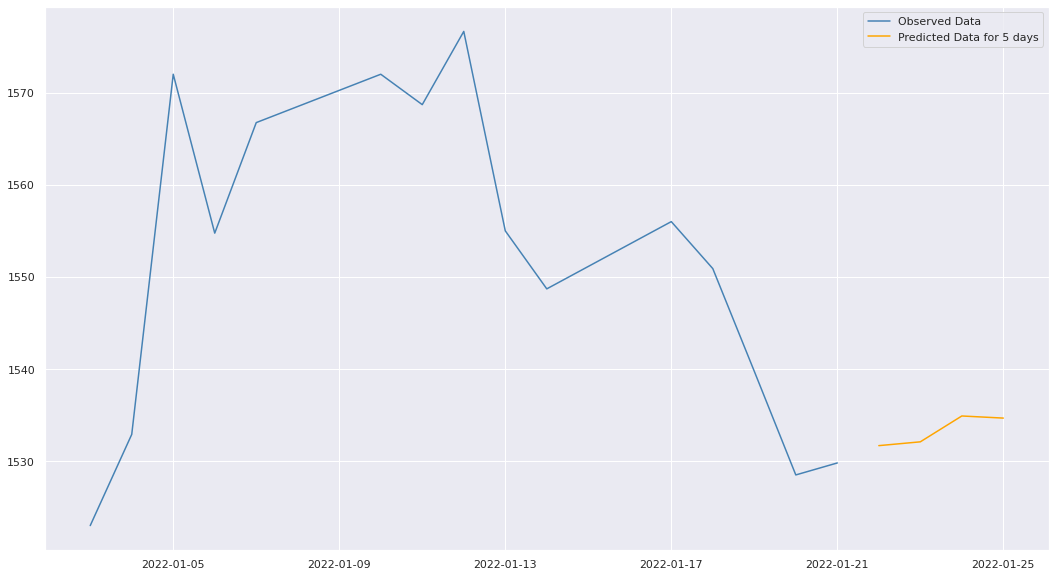

In [ ]:
predict_periods(5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



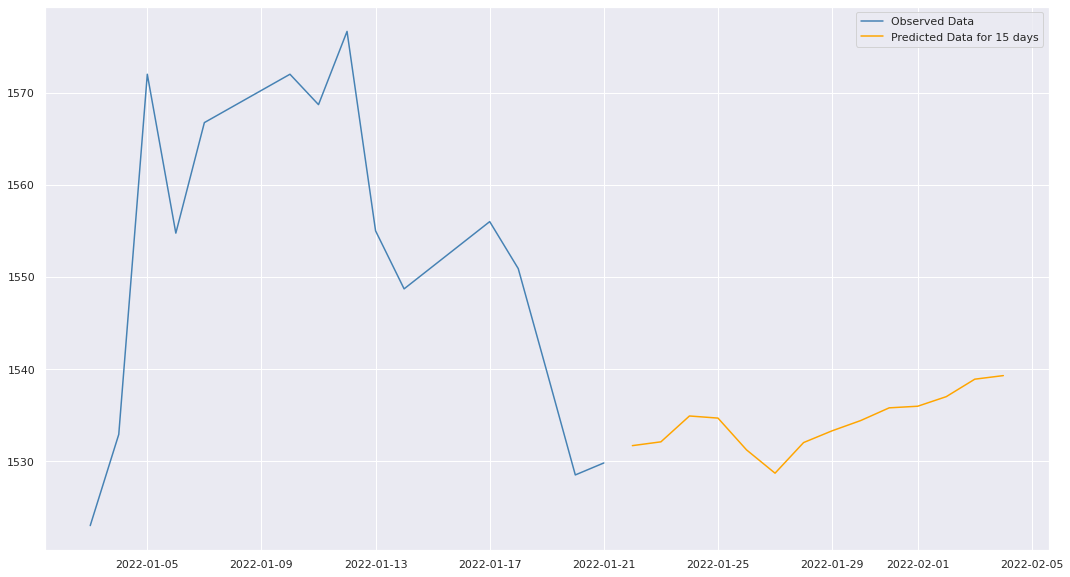

In [ ]:
predict_periods(15)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



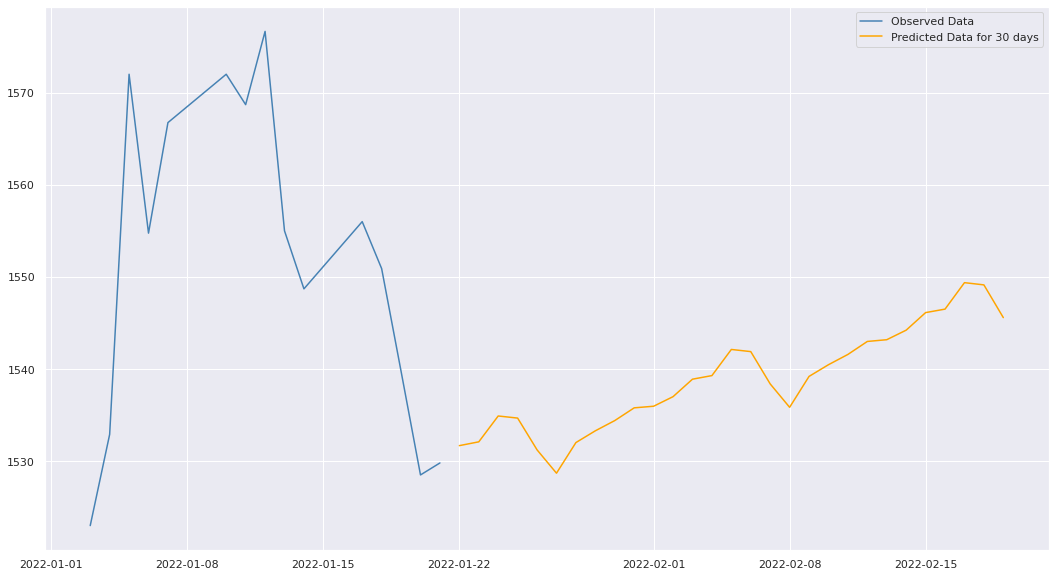

In [ ]:
predict_periods(30)